# Clusterizando os clientes de uma loja de shopping 

#### Modelo de cluster desenvolvido em Python e utilizando o algoritmo de Machine Learning K-Means

Este exercício suponha o desejo de uma empresa em desenvolver campanhas de marketing junto aos seus clientes para alavancar seu faturamento. 

Essa é uma situação muito comum nas organizações, mas o sucesso de uma campanha está diretamente ligado ao direcionamento correto para um público alvo. Assim, traçar os perfis de clientes é um passo importante para que ela possa realizar ações de marketing que façam sentido para cada um de seus públicos.

In [1]:
## Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Esse dataframe possui uma coluna “CustomerID” e as variáveis “Gender”, “Age”, “Annual Income” e “Spending Score”.

Para esta análise exploratório utilizamos apenas as colunas que iremos utilizar para o agrupamento, que serão “Annual Income” e “Spending Score”. 

Como o foco é definir perfis de consumo, não utilizaremos dados de gênero e idade. 

In [4]:
# redefinindo o dataframe

data = data.set_index('CustomerID')
df = data[['Annual Income (k$)','Spending Score (1-100)']]

df.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


Padronizando as variáveis

In [5]:
## Feature Scaling

scaler = StandardScaler()
dfa_std = scaler.fit_transform(df)

dfa_std[0]

array([-1.73899919, -0.43480148])

In [6]:
# https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9

from sklearn.cluster import KMeans

def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

calculate_wcss(df)

[181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37271.88623658948,
 30259.657207285458,
 25029.25342493588,
 21830.04197804944,
 19646.482018947245,
 17511.7418692661,
 15838.717785514093,
 14789.613155949357,
 13388.229394421032,
 11901.421679950477,
 10850.557145047937,
 10012.870805546721,
 9847.876795083886,
 8666.13952977968,
 8166.948017385091]

## Verificando o número de clusters e agrupando a base de dados

Na clusterização, um grande objetivo é manter a menor variância dentro dos grupos, os deixando mais homogêneos. Para definir o número de clusters a serem considerados, utilizando o “Elbow Method”, plotando os dados em um gráfico de linhas, onde no eixo X estão o número de clusters e no eixo Y, o somatório das variâncias.

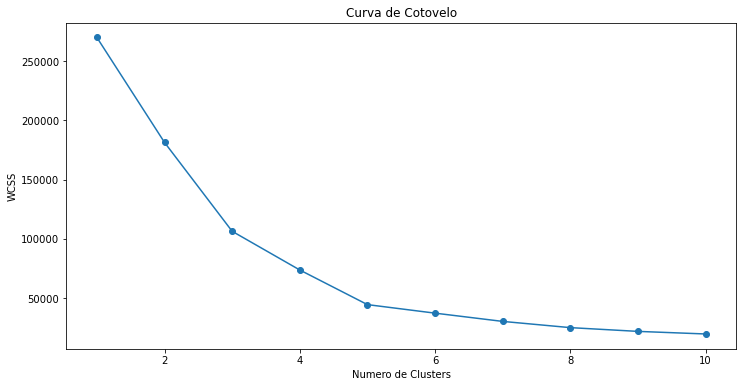

In [7]:
# Cria a Curva de Cotovelo para encontrar o Numero Ideal de Clusters
# https://www.kaggle.com/eriveltonguedes/7-clusteriza-o-k-means-erivelton

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
# Mostra o Gráfico
plt.figure(figsize=(12,6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Curva de Cotovelo')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()




## Clustering with two feature

Repare que quanto mais aumenta o número de clusters, mais diminue a variância dentro deles. No entanto, após o número 5 a queda é menos acentuada, o que demonstra que a partir dali podemos estar dividindo em grupos diferentes clientes que possuem perfis parecidos.

Em tradução, o “Elbow Method” significa “Método do Cotovelo”, pois consideramos o número de clusters aquele que aparece bem na volta da curva, como um cotovelo mesmo. Nesse caso, o 5 parece ser o número ideal a ser utilizado.

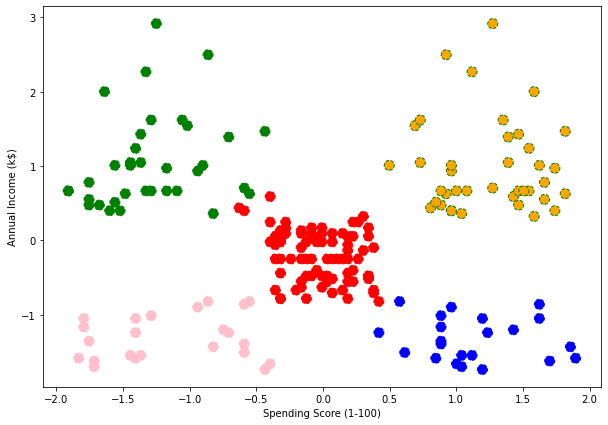

In [8]:
## Clustering with KMeans
kmeans = KMeans(n_clusters=5, random_state=42).fit(dfa_std)
labels = kmeans.labels_

new_dfa = pd.DataFrame(data = dfa_std, columns = ['Annual Income (k$)','Spending Score (1-100)'])
new_dfa['label_kmeans'] = labels

fig, ax = plt.subplots(figsize=(10,7))
plt.scatter(new_dfa["Spending Score (1-100)"][new_dfa["label_kmeans"] == 0], new_dfa["Annual Income (k$)"][new_dfa["label_kmeans"] == 0], 
            color = "blue", s=100, edgecolor='blue',linestyle='--')

plt.scatter(new_dfa["Spending Score (1-100)"][new_dfa["label_kmeans"] == 1], new_dfa["Annual Income (k$)"][new_dfa["label_kmeans"] == 1], 
            color = "red", s=100, edgecolor='red',linestyle='--')

plt.scatter(new_dfa["Spending Score (1-100)"][new_dfa["label_kmeans"] == 2], new_dfa["Annual Income (k$)"][new_dfa["label_kmeans"] == 2], 
            color = "green", s=100, edgecolor='green',linestyle='--')

plt.scatter(new_dfa["Spending Score (1-100)"][new_dfa["label_kmeans"] == 3], new_dfa["Annual Income (k$)"][new_dfa["label_kmeans"] == 3], 
            color = "pink", s=100, edgecolor='pink',linestyle='--')

plt.scatter(new_dfa["Spending Score (1-100)"][new_dfa["label_kmeans"] == 4], new_dfa["Annual Income (k$)"][new_dfa["label_kmeans"] == 4], 
            color = "orange", s=100, edgecolor='green',linestyle='--')

centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500);
ax.set_xlabel('Spending Score (1-100)')
ax.set_ylabel('Annual Income (k$)')
plt.show()

(teste com outros valores)

## Juntando os dados

Após decidir utilizar o agrupamento do “clientes.k5”, importamos novamente a base de dados inicial e concatenamos, criando uma nova coluna que se refere a qual grupo aquele cliente pertence.

Salvando cluster no dataframe

https://datascience.stackexchange.com/questions/48693/perform-k-means-clustering-over-multiple-columns

In [15]:
### Get all the features columns except the class
features = list(data.columns)[:-2]

### Get the features data
data = data[features]

clustering_kmeans = KMeans(n_clusters=5, precompute_distances="auto", n_jobs=-1)

data['clusters'] = clustering_kmeans.fit_predict(data)

ValueError: could not convert string to float: 'Male'

# Referência

Este caderno usou como referência o artigo [Clusterizando os clientes de uma loja de shopping utilizando o algoritmo K-Means](https://medium.com/jogandoosdados/clusterizando-os-clientes-de-uma-loja-de-shopping-utilizando-o-algoritmo-kmeans-91cf5b330204) de Hernandes Matias Junior